In [5]:
import pandas as pd
import glob
import os

raw_path = "../best_sellers"
clean_path = "../cleaned_best_sellers"

os.makedirs(clean_path, exist_ok=True)

keep_cols = [
    "product_title",
    "avg_current_price",
    "avg_rating",
    "review_count"
]

files = glob.glob(f"{raw_path}/*_bestsellers.csv")
print("Found files:", files)

for file in files:
    brand = os.path.basename(file).replace("_bestsellers.csv", "")
    df = pd.read_csv(file)

    # Clean column names
    df.columns = df.columns.str.strip().str.lower()

    # Select & trim
    df_cleaned = df[keep_cols].head(5).copy()
    df_cleaned["brand"] = brand

    # Save cleaned CSV
    output_path = os.path.join(clean_path, f"{brand}_clean.csv")
    df_cleaned.to_csv(output_path, index=False)

    print(f"Saved cleaned {brand} data → {output_path}")

print("\n All brands cleaned and exported successfully!")


Found files: ['../best_sellers/skims_bestsellers.csv', '../best_sellers/lululemon_bestsellers.csv', '../best_sellers/alo_bestsellers.csv']
Saved cleaned skims data → ../cleaned_best_sellers/skims_clean.csv
Saved cleaned lululemon data → ../cleaned_best_sellers/lululemon_clean.csv
Saved cleaned alo data → ../cleaned_best_sellers/alo_clean.csv

 All brands cleaned and exported successfully!


In [12]:
clean_path = "../cleaned_best_sellers"

combined = pd.concat(
    (pd.read_csv(f) for f in glob.glob(f"{clean_path}/*_clean.csv")),
    ignore_index=True
)

print(combined)


                                        product_title  avg_current_price  \
0                   Accolade 1/4 Zip Pullover - Black             148.00   
1                             Accolade Hoodie - Black             148.00   
2             Accolade Straight Leg Sweatpant - Black             138.00   
3                          Accolade Hoodie - Espresso             148.00   
4                 Accolade Crew Neck Pullover - Black             138.00   
5   Cotton Fleece zclassic Zip Up Hoodie | Light H...              94.00   
6             Cotton Rib Legging | Light Heather Grey              56.00   
7                           Cotton Rib Legging | Chai              56.00   
8   Cotton Fleece Classic Hoodie | Light Heather Grey              88.00   
9          Cotton Fleece Classic Zip Up Hoodie | Onyx              94.00   
10                         Nulu Cropped Define Jacket             128.00   
11                                Define Jacket *Nulu             128.00   
12          

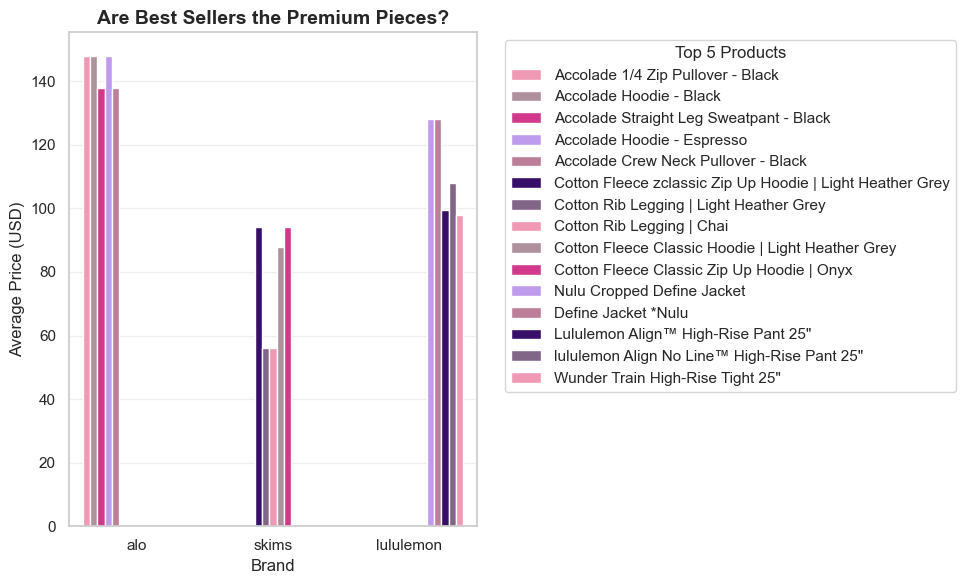

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='whitegrid', rc={'axes.facecolor': '#ffffff', 'grid.alpha': 0.3})

# 🎨 Custom brand palette
custom_palette = ["#FF8AAF","#B48B9C", "#EC1F8C", "#BD8DFB", "#C77398", "#360078", "#86608E"]

# ✅ Expand palette to cover all hue levels
unique_hues = combined["product_title"].nunique()
palette_expanded = sns.color_palette(custom_palette, n_colors=unique_hues)

plt.figure(figsize=(10,6))
sns.barplot(
    data=combined,
    x="brand",
    y="avg_current_price",
    hue="product_title",
    dodge=True,
    palette=palette_expanded   # ✅ Explicitly pass expanded palette
)

plt.title("Are Best Sellers the Premium Pieces?", fontsize=14, weight='bold')
plt.ylabel("Average Price (USD)")
plt.xlabel("Brand")
plt.legend(title="Top 5 Products", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
